## Fashion Retailer Using MNIST

A MNIST-like dataset for fashion items. 
See the [original repository](https://github.com/zalandoresearch/fashion-mnist) for more information and visualization examples.

In [3]:
#Since tensorflow is used as backend, set up on cluster
%%bash
pip install tensorflow-gpu

Collecting tensorflow-gpu
 Downloading https://files.pythonhosted.org/packages/3d/21/63bf11a6bb4c1c85d52b259578bec20ef6f8894a13870f8f4f8b69635586/tensorflow_gpu-1.12.0-cp27-cp27mu-manylinux1_x86_64.whl (281.7MB)
Collecting astor>=0.6.0 (from tensorflow-gpu)
 Downloading https://files.pythonhosted.org/packages/35/6b/11530768cac581a12952a2aad00e1526b89d242d0b9f59534ef6e6a1752f/astor-0.7.1-py2.py3-none-any.whl
Collecting enum34>=1.1.6 (from tensorflow-gpu)
 Downloading https://files.pythonhosted.org/packages/c5/db/e56e6b4bbac7c4a06de1c50de6fe1ef3810018ae11732a50f15f62c7d050/enum34-1.1.6-py2-none-any.whl
Collecting protobuf>=3.6.1 (from tensorflow-gpu)
 Downloading https://files.pythonhosted.org/packages/b8/c2/b7f587c0aaf8bf2201405e8162323037fe8d17aa21d3c7dda811b8d01469/protobuf-3.6.1-cp27-cp27mu-manylinux1_x86_64.whl (1.1MB)
Collecting keras-preprocessing>=1.0.5 (from tensorflow-gpu)
 Downloading https://files.pythonhosted.org/packages/14/8d/443591dd9f42cdde966a14ea2d59e7a781b77a8f09652288af61bec93b81/Keras_Preprocessing-1.0.8-py2.py3-none-any.whl (59kB)
Collecting gast>=0.2.0 (from tensorflow-gpu)
 Downloading https://files.pythonhosted.org/packages/4e/35/11749bf99b2d4e3cceb4d55ca22590b0d7c2c62b9de38ac4a4a7f4687421/gast-0.2.2.tar.gz
Requirement already satisfied (use --upgrade to upgrade): six>=1.10.0 in /usr/lib/python2.7/dist-packages (from tensorflow-gpu)
Requirement already satisfied (use --upgrade to upgrade): wheel in /usr/lib/python2.7/dist-packages (from tensorflow-gpu)
Collecting absl-py>=0.1.6 (from tensorflow-gpu)
 Downloading https://files.pythonhosted.org/packages/31/bc/ab68120d1d89ae23b694a55fe2aece2f91194313b71f9b05a80b32d3c24b/absl-py-0.7.0.tar.gz (96kB)
Collecting backports.weakref>=1.0rc1 (from tensorflow-gpu)
 Downloading https://files.pythonhosted.org/packages/88/ec/f598b633c3d5ffe267aaada57d961c94fdfa183c5c3ebda2b6d151943db6/backports.weakref-1.0.post1-py2.py3-none-any.whl
Collecting termcolor>=1.1.0 (from tensorflow-gpu)
 Downloading https://files.pythonhosted.org/packages/8a/48/a76be51647d0eb9f10e2a4511bf3ffb8cc1e6b14e9e4fab46173aa79f981/termcolor-1.1.0.tar.gz
Collecting tensorboard<1.13.0,>=1.12.0 (from tensorflow-gpu)
 Downloading https://files.pythonhosted.org/packages/51/ae/9840c4837c6f54034ac942b5344396e8c3d74686a9bd29beafdf633cc221/tensorboard-1.12.2-py2-none-any.whl (3.0MB)
Collecting numpy>=1.13.3 (from tensorflow-gpu)
 Downloading https://files.pythonhosted.org/packages/e0/b5/63b79fe426433fa1cd110eb04a94ec0c6967e56e5f57c98caf455a5fb6e2/numpy-1.16.1-cp27-cp27mu-manylinux1_x86_64.whl (17.0MB)
Collecting grpcio>=1.8.6 (from tensorflow-gpu)
 Downloading https://files.pythonhosted.org/packages/ab/13/b4f3d8551e0663ad1a6ba8539057ecd0715bcdf3f2eea235f67b248f37cb/grpcio-1.18.0-cp27-cp27mu-manylinux1_x86_64.whl (10.4MB)
Collecting mock>=2.0.0 (from tensorflow-gpu)
 Downloading https://files.pythonhosted.org/packages/e6/35/f187bdf23be87092bd0f1200d43d23076cee4d0dec109f195173fd3ebc79/mock-2.0.0-py2.py3-none-any.whl (56kB)
Collecting keras-applications>=1.0.6 (from tensorflow-gpu)
 Downloading https://files.pythonhosted.org/packages/90/85/64c82949765cfb246bbdaf5aca2d55f400f792655927a017710a78445def/Keras_Applications-1.0.7-py2.py3-none-any.whl (51kB)
Requirement already satisfied (use --upgrade to upgrade): setuptools in /usr/lib/python2.7/dist-packages (from protobuf>=3.6.1->tensorflow-gpu)
Collecting werkzeug>=0.11.10 (from tensorboard<1.13.0,>=1.12.0->tensorflow-gpu)
 Downloading https://files.pythonhosted.org/packages/20/c4/12e3e56473e52375aa29c4764e70d1b8f3efa6682bef8d0aae04fe335243/Werkzeug-0.14.1-py2.py3-none-any.whl (322kB)
Requirement already satisfied (use --upgrade to upgrade): futures>=3.1.1; python_version < "3" in /usr/local/lib/python2.7/dist-packages (from tensorboard<1.13.0,>=1.12.0->tensorflow-gpu)
Collecting markdown>=2.6.8 (from tensorboard<1.13.0,>=1.12.0->tensorflow-gpu)
 Downloading https://files.pythonhosted.org/packages/7a/6b/5600647404ba15545ec37d2f7f58844d690baf2f81f3a60b862e48f29287

In [4]:
import os
os.environ['KERAS_BACKEND'] = "tensorflow-gpu"

import sys
import urllib

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

from keras.models import Sequential
from keras.utils import to_categorical

from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import optimizers
from keras import losses
#actual dataset
from keras.datasets import fashion_mnist 


#dataframe, picture augmenters 
import numpy as np
from PIL import Image
from io import BytesIO

In [5]:
#assign your variables to x and y train
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Downloading data from http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz

 8192/29515 [=======>......................] - ETA: 0s
16384/29515 [===============>..............] - ETA: 0s
32768/29515 [=================================] - 0s 3us/step
Downloading data from http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz

 8192/26421880 [..............................] - ETA: 0s
 16384/26421880 [..............................] - ETA: 2:23
 49152/26421880 [..............................] - ETA: 1:35
 106496/26421880 [..............................] - ETA: 1:06
 229376/26421880 [..............................] - ETA: 40s 
 466944/26421880 [..............................] - ETA: 24s
 860160/26421880 [..............................] - ETA: 15s
 1720320/26421880 [>.............................] - ETA: 8s 
 3424256/26421880 [==>...........................] - ETA: 4s
 6488064/26421880 [======>.......................] - ETA: 2s
 9273344/26421880 [=========>....................] - ETA: 1s
11501568/26421880 [============>.................] - ETA: 1s
14475264/26421880 [===============>..............] - ETA: 0s
17235968/26421880 [==================>...........] - ETA: 0s
19619840/26421880 [=====================>........] - ETA: 0s
22503424/26421880 [========================>.....] - ETA: 0s
25337856/26421880 [===========================>..] - ETA: 0s
26427392/26421880 [==============================] - 1s 0us/step
Downloading data from http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

8192/5148 [===============================================] - 0s 0us/step
Downloading data from http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz

 8192/4422102 [..............................] - ETA: 0s
 16384/4422102 [..............................] - ETA: 23s
 49152/4422102 [..............................] - ETA: 15s
 106496/4422102 [..............................] - ETA: 10s
 229376/4422102 [>.............................] - ETA: 6s 
 466944/4422102 [==>...........................] - ETA: 3s
 901120/4422102 [=====>........................] - ETA: 2s
1818624/4422102 [===========>..................] - ETA: 0s
3235840/4422102 [====================>.........] - ETA: 0s
4423680/4422102 [==============================] - 1s 0us/step

In [6]:
#reshape into requirement

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

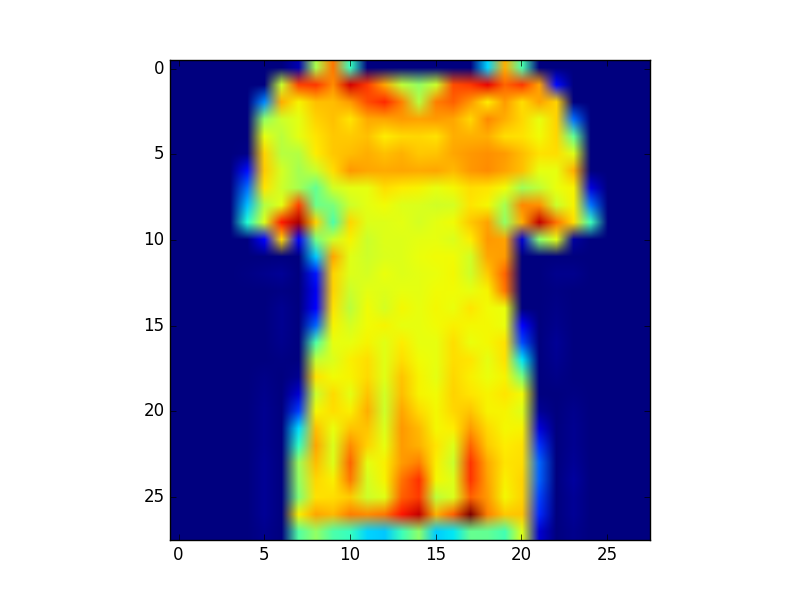

In [7]:
#Explain of what the training images look like
import matplotlib.pyplot as plt

pixels = x_train[10].reshape((28, 28))
plt.imshow(pixels)
plt.show()
display()


In [8]:
batch_size = 256
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
conv2d_1 (Conv2D) (None, 26, 26, 32) 320 
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32) 0 
_________________________________________________________________
dropout_1 (Dropout) (None, 13, 13, 32) 0 
_________________________________________________________________
conv2d_2 (Conv2D) (None, 11, 11, 64) 18496 
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64) 0 
_________________________________________________________________
dropout_2 (Dropout) (None, 5, 5, 64) 0 
_________________________________________________________________
conv2d_3 (Conv2D) (None, 3, 3, 128) 73856 
_________________________________________________________________
dropout_3 (Dropout) (None, 3, 3, 128) 0 
_________________________________________________________________
flatten_1 (Flatten) (None, 1152) 0 
_________________________________________________________________
dense_1 (Dense) (None, 128) 147584 
_________________________________________________________________
dropout_4 (Dropout) (None, 128) 0 
_________________________________________________________________
dense_2 (Dense) (None, 10) 1290 
=================================================================
Total params: 241,546
Trainable params: 241,546
Non-trainable params: 0
_________________________________________________________________

In [9]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs)

Epoch 1/10

 256/60000 [..............................] - ETA: 1:59 - loss: 2.4303 - acc: 0.1016
 512/60000 [..............................] - ETA: 1:14 - loss: 2.3983 - acc: 0.1055
 768/60000 [..............................] - ETA: 58s - loss: 2.3470 - acc: 0.1302 
 1024/60000 [..............................] - ETA: 50s - loss: 2.3157 - acc: 0.1475
 1280/60000 [..............................] - ETA: 46s - loss: 2.2790 - acc: 0.1727
 1536/60000 [..............................] - ETA: 43s - loss: 2.2447 - acc: 0.1888
 1792/60000 [..............................] - ETA: 40s - loss: 2.2132 - acc: 0.2070
 2048/60000 [>.............................] - ETA: 38s - loss: 2.1776 - acc: 0.2231
 2304/60000 [>.............................] - ETA: 37s - loss: 2.1418 - acc: 0.2391
 2560/60000 [>.............................] - ETA: 36s - loss: 2.1047 - acc: 0.2523
 2816/60000 [>.............................] - ETA: 35s - loss: 2.0616 - acc: 0.2663
 3072/60000 [>.............................] - ETA: 34s - loss: 2.0214 - acc: 0.2793
 3328/60000 [>.............................] - ETA: 33s - loss: 1.9765 - acc: 0.2948
 3584/60000 [>.............................] - ETA: 33s - loss: 1.9382 - acc: 0.3083
 3840/60000 [>.............................] - ETA: 32s - loss: 1.8986 - acc: 0.3201
 4096/60000 [=>............................] - ETA: 31s - loss: 1.8644 - acc: 0.3308
 4352/60000 [=>............................] - ETA: 31s - loss: 1.8370 - acc: 0.3378
 4608/60000 [=>............................] - ETA: 30s - loss: 1.8081 - acc: 0.3457
 4864/60000 [=>............................] - ETA: 30s - loss: 1.7823 - acc: 0.3520
 5120/60000 [=>............................] - ETA: 30s - loss: 1.7545 - acc: 0.3609
 5376/60000 [=>............................] - ETA: 29s - loss: 1.7273 - acc: 0.3681
 5632/60000 [=>............................] - ETA: 29s - loss: 1.7068 - acc: 0.3734
 5888/60000 [=>............................] - ETA: 29s - loss: 1.6883 - acc: 0.3787
 6144/60000 [==>...........................] - ETA: 28s - loss: 1.6699 - acc: 0.3843
 6400/60000 [==>...........................] - ETA: 28s - loss: 1.6468 - acc: 0.3912
 6656/60000 [==>...........................] - ETA: 28s - loss: 1.6225 - acc: 0.3995
 6912/60000 [==>...........................] - ETA: 28s - loss: 1.6010 - acc: 0.4074
 7168/60000 [==>...........................] - ETA: 27s - loss: 1.5790 - acc: 0.4149
 7424/60000 [==>...........................] - ETA: 27s - loss: 1.5591 - acc: 0.4219
 7680/60000 [==>...........................] - ETA: 27s - loss: 1.5420 - acc: 0.4283
 7936/60000 [==>...........................] - ETA: 27s - loss: 1.5264 - acc: 0.4349
 8192/60000 [===>..........................] - ETA: 26s - loss: 1.5091 - acc: 0.4415
 8448/60000 [===>..........................] - ETA: 26s - loss: 1.4933 - acc: 0.4467
 8704/60000 [===>..........................] - ETA: 26s - loss: 1.4774 - acc: 0.4537
 8960/60000 [===>..........................] - ETA: 26s - loss: 1.4612 - acc: 0.4599
 9216/60000 [===>..........................] - ETA: 26s - loss: 1.4485 - acc: 0.4654
 9472/60000 [===>..........................] - ETA: 25s - loss: 1.4403 - acc: 0.4682
 9728/60000 [===>..........................] - ETA: 25s - loss: 1.4273 - acc: 0.4725
 9984/60000 [===>..........................] - ETA: 25s - loss: 1.4153 - acc: 0.4778
10240/60000 [====>.........................] - ETA: 25s - loss: 1.4029 - acc: 0.4829
10496/60000 [====>.........................] - ETA: 25s - loss: 1.3908 - acc: 0.4868
10752/60000 [====>.........................] - ETA: 24s - loss: 1.3793 - acc: 0.4909
11008/60000 [====>.........................] - ETA: 24s - loss: 1.3686 - acc: 0.4951
11264/60000 [====>.........................] - ETA: 24s - loss: 1.3568 - acc: 0.4995
11520/60000 [====>.........................] - ETA: 24s - loss: 1.3478 - acc: 0.5026
11776/60000 [====>.........................] - ETA: 24s - loss: 1.3343 - acc: 0.5073
12032/60000 [=====>........................] - ETA: 24s - loss: 1.3255 - acc: 

In [10]:
#evaluate the runs
test_val = model.evaluate(x_test, y_test)

32/10000 [..............................] - ETA: 22s
 288/10000 [..............................] - ETA: 4s 
 576/10000 [>.............................] - ETA: 2s
 896/10000 [=>............................] - ETA: 2s
 1216/10000 [==>...........................] - ETA: 2s
 1504/10000 [===>..........................] - ETA: 1s
 1792/10000 [====>.........................] - ETA: 1s
 2080/10000 [=====>........................] - ETA: 1s
 2400/10000 [======>.......................] - ETA: 1s
 2720/10000 [=======>......................] - ETA: 1s
 3040/10000 [========>.....................] - ETA: 1s
 3360/10000 [=========>....................] - ETA: 1s
 3648/10000 [=========>....................] - ETA: 1s
 3936/10000 [==========>...................] - ETA: 1s
 4224/10000 [===========>..................] - ETA: 1s
 4544/10000 [============>.................] - ETA: 1s
 4864/10000 [=============>................] - ETA: 0s
 5184/10000 [==============>...............] - ETA: 0s
 5472/10000 [===============>..............] - ETA: 0s
 5760/10000 [================>.............] - ETA: 0s
 6080/10000 [=================>............] - ETA: 0s
 6368/10000 [==================>...........] - ETA: 0s
 6656/10000 [==================>...........] - ETA: 0s
 6976/10000 [===================>..........] - ETA: 0s
 7264/10000 [====================>.........] - ETA: 0s
 7488/10000 [=====================>........] - ETA: 0s
 7776/10000 [======================>.......] - ETA: 0s
 8064/10000 [=======================>......] - ETA: 0s
 8352/10000 [========================>.....] - ETA: 0s
 8640/10000 [========================>.....] - ETA: 0s
 8928/10000 [=========================>....] - ETA: 0s
 9216/10000 [==========================>...] - ETA: 0s
 9536/10000 [===========================>..] - ETA: 0s
 9856/10000 [============================>.] - ETA: 0s
10000/10000 [==============================] - 2s 184us/step

In [11]:
#Look at metrics
print("Model's Accuracy on Test Set = "
      + "{0:.2f}%".format(test_val[1] * 100))

Model's Accuracy on Test Set = 90.54%

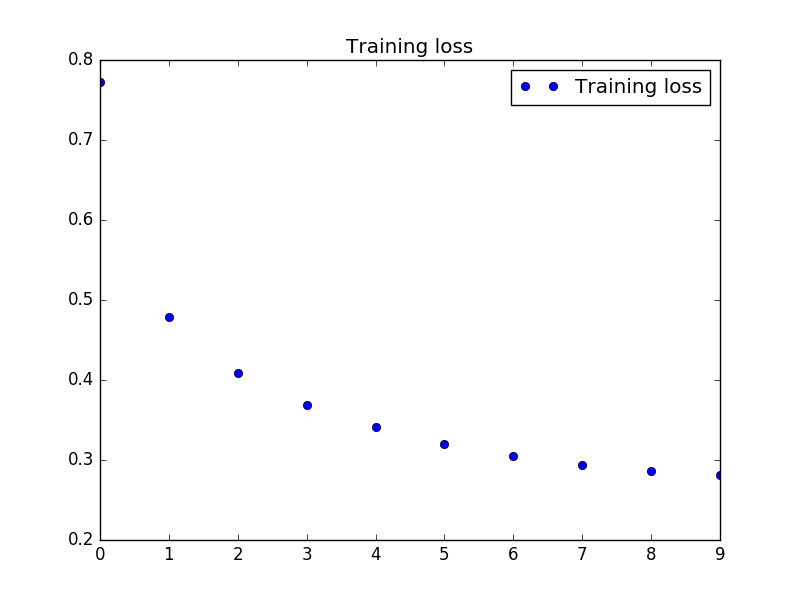

In [12]:
import matplotlib.pyplot as plt
#%matplotlib inline - not supported in databricks but works in py IDE

accuracy = history.history['acc']
# val_accuracy = history.history['val_acc']
loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()
display()

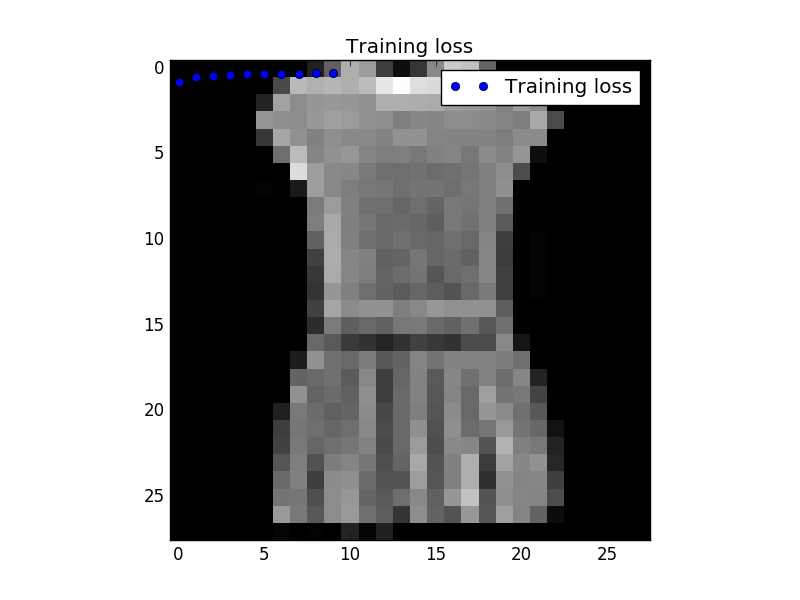

In [13]:
test_im = x_train[3]
plt.imshow(test_im.reshape(28,28), cmap='gray', interpolation='none')
plt.show()
display()

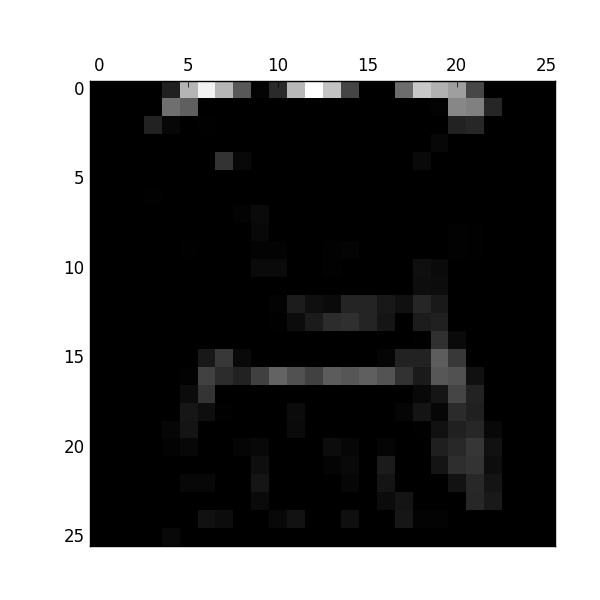

In [14]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='gray')
display()

In [15]:
layer_names = []
for layer in model.layers[:-1]:
    if isinstance(layer, Conv2D):
        layer_names.append(layer.name)
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features / images_per_row
    n_cols = int(n_cols)
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='bone')
    display